In [1]:
#IMPORTO LIBRERIAS
import pandas as pd
import numpy as np
import datetime
import re
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORTO ENTRONO DE TRABAJO
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
#DEFINO RUTA DE TRABAJO
root_path = "/content/gdrive/MyDrive/UTN/5° año/Ciencia de datos/TP Cienca de datos/"
#root_path = "/content/gdrive/drive/folders/1oJJYAqiOnK4f3m5Ym4Lll4hEgd_qaMnW/"

plot_path = root_path + "figures/"

# Datasets recorridos 2020 y 2021

In [4]:
#IMPORTO EL DATASET 2020
recorridos_2020 = pd.read_csv(root_path+"recorridos-realizados-2020.csv")
recorridos_2020.head()

,duracion_recorrido,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,periodo
0,882,116,2020-12-31 23:54:22,116 - HOSPITAL ALEMÁN,2021-01-01 00:09:04,214.0,142 - Armenia y Gorriti,666202,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
1,894,116,2020-12-29 12:39:18,116 - HOSPITAL ALEMÁN,2020-12-29 12:54:12,214.0,142 - Armenia y Gorriti,332689,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
2,1361,116,2020-12-21 21:21:38,116 - HOSPITAL ALEMÁN,2020-12-21 21:44:19,214.0,142 - Armenia y Gorriti,57949,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
3,1010,116,2020-12-20 21:58:19,116 - HOSPITAL ALEMÁN,2020-12-20 22:15:09,214.0,142 - Armenia y Gorriti,454846,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
4,1490,116,2020-12-20 13:32:53,116 - HOSPITAL ALEMÁN,2020-12-20 13:57:43,214.0,142 - Armenia y Gorriti,690975,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#IMPORTO EL DATASET 2021
recorridos_2021 = pd.read_csv(root_path+"recorridos-realizados-2021.csv")
recorridos_2021.head()

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,MEMBER,ICONIC,CODE
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,MEMBER,ICONIC,CODE
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,MEMBER,ICONIC,CODE
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,MEMBER,ICONIC,CODE
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,MEMBER,ICONIC,CODE


In [7]:
#ESTANDARIZO LOS NOMBRES DE LAS ESTACIONES PARA 2020
recorridos_2020["nombre_estacion_origen"].replace(to_replace = '\d{3}\s\-\s', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_origen"].replace(to_replace = '\d{3}\s\-', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_origen"].replace(to_replace = '\d{3}\-', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_origen"].replace(to_replace = '\d{3}\-\s', value = '', regex = True, inplace = True)

recorridos_2020["nombre_estacion_destino"].replace(to_replace = '\d{3}\s\-\s', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_destino"].replace(to_replace = '\d{3}\s\-', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_destino"].replace(to_replace = '\d{3}\-', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_destino"].replace(to_replace = '\d{3}\-\s', value = '', regex = True, inplace = True)

In [8]:
#ESTANDARIZO LOS NOMBRES DE LAS ESTACIONES PARA 2021
recorridos_2021["Nombre de estación de inicio"].replace(to_replace = '\d{3}\s\-\s', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de inicio"].replace(to_replace = '\d{3}\s\-', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de inicio"].replace(to_replace = '\d{3}\-', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de inicio"].replace(to_replace = '\d{3}\-\s', value = '', regex = True, inplace = True)

recorridos_2021["Nombre de estación de fin de viaje"].replace(to_replace = '\d{3}\s\-\s', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de fin de viaje"].replace(to_replace = '\d{3}\s\-', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de fin de viaje"].replace(to_replace = '\d{3}\-', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de fin de viaje"].replace(to_replace = '\d{3}\-\s', value = '', regex = True, inplace = True)

In [9]:
#PONGO TODOS LOS NOMBRES DE ESTACIONES EN MAYÚSCULAS 
recorridos_2020["nombre_estacion_origen"] = recorridos_2020["nombre_estacion_origen"].str.upper()
recorridos_2020["nombre_estacion_destino"] = recorridos_2020["nombre_estacion_destino"].str.upper()

recorridos_2021["Nombre de estación de inicio"] = recorridos_2021["Nombre de estación de inicio"].str.upper()
recorridos_2021["Nombre de estación de fin de viaje"] = recorridos_2021["Nombre de estación de fin de viaje"].str.upper()

In [10]:
#ELIMINO ESPACIOS ANTES Y DESPUES DEL NOMBRE DE ESTACIÓN
recorridos_2020["nombre_estacion_origen"] = recorridos_2020["nombre_estacion_origen"].str.strip()
recorridos_2020["nombre_estacion_destino"] = recorridos_2020["nombre_estacion_destino"].str.strip()

recorridos_2021["Nombre de estación de inicio"] = recorridos_2021["Nombre de estación de inicio"].str.strip()
recorridos_2021["Nombre de estación de fin de viaje"] = recorridos_2021["Nombre de estación de fin de viaje"].str.strip()

In [11]:
#BORRO COLUMNAS INNECESARIAS
recorridos_2020 = recorridos_2020.drop(["id_estacion_origen", "id_estacion_destino", "direccion_estacion_origen", "long_estacion_origen", "lat_estacion_origen", "direccion_estacion_destino", "long_estacion_destino", "lat_estacion_destino", "periodo"], axis=1)
recorridos_2021 = recorridos_2021.drop(["ID", "Id de estación de inicio", "Id de estación de fin de viaje", "Tipo de ciclista", "Modelo de bicicleta", "Origen de viaje", "Estado cerrado"], axis=1)

In [12]:
recorridos_2020.head()

,duracion_recorrido,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,nombre_estacion_destino,id_usuario
0,882,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,666202
1,894,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,332689
2,1361,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,57949
3,1010,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,454846
4,1490,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,690975


In [13]:
recorridos_2021.head()

,Duración,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Nombre de estación de fin de viaje,ID de ciclista
0,437,2021-06-02 16:14:35,HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,PLAZA LIBERTAD,119795
1,406,2021-06-02 16:11:01,DONATO ALVAREZ,2021-06-02 16:17:47,PLAZA SAENZ PEÑA,348428
2,299,2021-06-02 16:10:08,TAMBORINI,2021-06-02 16:15:07,COGHLAN,690073
3,400,2021-06-02 16:09:34,HUMBERTO 1°,2021-06-02 16:16:14,CONSTITUCIÓN,713938
4,591,2021-06-02 16:09:32,VELASCO,2021-06-02 16:19:23,VILLARROEL,35926


In [14]:
#RENOMBRO COLUMNAS
recorridos_2020 = recorridos_2020.rename(columns={"duracion_recorrido": "Duración", "fecha_origen_recorrido": "Fecha de inicio", 'nombre_estacion_origen': 'Estación de inicio', "fecha_destino_recorrido": "Fecha de fin", "nombre_estacion_destino": "Estación de fin", "id_usuario": "ID ciclista"})
recorridos_2021 = recorridos_2021.rename(columns={'Nombre de estación de inicio': 'Estación de inicio', "Nombre de estación de fin de viaje": "Estación de fin", "ID de ciclista": "ID ciclista"})

In [15]:
print(recorridos_2020.columns)
print(recorridos_2021.columns)

Index(['Duración', 'Fecha de inicio', 'Estación de inicio', 'Fecha de fin',
       'Estación de fin', 'ID ciclista'],
      dtype='object')
Index(['Duración', 'Fecha de inicio', 'Estación de inicio', 'Fecha de fin',
       'Estación de fin', 'ID ciclista'],
      dtype='object')


In [16]:
print(len(recorridos_2020["Estación de inicio"].unique()))
print(len(recorridos_2021["Estación de inicio"].unique()))

201
233


In [17]:
print(np.shape(recorridos_2020))
print(np.shape(recorridos_2021))

(2002945, 6)
(1328726, 6)


In [18]:
#CONCATENO LOS DATASETS
recorridos_2020_2021 = pd.concat([recorridos_2020, recorridos_2021], axis=0)

In [19]:
#RESETEO INDICES
recorridos_2020_2021.reset_index(inplace=True, drop=True)

In [20]:
print(np.shape(recorridos_2020_2021))

(3331671, 6)


In [21]:
#PASO COLUMNA DURACION A MINUTOS Y REDONDEO A 1 DECIMAL
recorridos_2020_2021["Duración"] = recorridos_2020_2021["Duración"]/60
recorridos_2020_2021["Duración"] = recorridos_2020_2021["Duración"].round(1)

In [22]:
recorridos_2020_2021.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,ID ciclista
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,666202
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,332689
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,57949
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,454846
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,690975


In [23]:
#CHEQUEO VALORES NULOS
recorridos_2020_2021.isnull().sum()

Duración              0
Fecha de inicio       0
Estación de inicio    0
Fecha de fin          0
Estación de fin       3
ID ciclista           0
dtype: int64

In [24]:
#ELIMINO NANS YA QUE HAY SOLAMENTE 3
recorridos_2020_2021 = recorridos_2020_2021.dropna(axis = 0)

In [25]:
np.shape(recorridos_2020_2021)

(3331668, 6)

In [26]:
#PASO A DATE TIME Y OBTENGO COLUMNA CON MES, AÑO Y HORA
recorridos_2020_2021['Fecha de inicio']= pd.to_datetime(recorridos_2020_2021['Fecha de inicio'])
recorridos_2020_2021["Año"] = recorridos_2020_2021['Fecha de inicio'].dt.year
recorridos_2020_2021["Mes"] = recorridos_2020_2021['Fecha de inicio'].dt.month
recorridos_2020_2021["Día del mes"] = recorridos_2020_2021['Fecha de inicio'].dt.day
recorridos_2020_2021["Día de la semana"] = recorridos_2020_2021['Fecha de inicio'].dt.dayofweek
recorridos_2020_2021["Hora"] = recorridos_2020_2021['Fecha de inicio'].dt.hour

In [27]:
#OBTENGO COLUMA RECORRIDO, CON ESTACION DE INICIO Y FIN
recorridos_2020_2021["Recorrido"] = recorridos_2020_2021['Estación de inicio'] + " " + "-" + " " + recorridos_2020_2021['Estación de fin']

In [28]:
recorridos_2020_2021.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,ID ciclista,Año,Mes,Día del mes,Día de la semana,Hora,Recorrido
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,666202,2020,12,31,3,23,HOSPITAL ALEMÁN - ARMENIA Y GORRITI
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,332689,2020,12,29,1,12,HOSPITAL ALEMÁN - ARMENIA Y GORRITI
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,57949,2020,12,21,0,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,454846,2020,12,20,6,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,690975,2020,12,20,6,13,HOSPITAL ALEMÁN - ARMENIA Y GORRITI


# Dataset de ubicación de estaciones

In [29]:
#IMPORTO DATASET DE UBICACIONES DE ESTACIONES
ubicacion_estaciones = pd.read_csv(root_path+"nuevas-estaciones-bicicletas-publicas.csv")
ubicacion_estaciones.head()

,WKT,id,codigo,nombre,ubicacion,tipo,horario,anclajes_t
0,POINT (-58.3747109506359 -34.5924239181221),2,2,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
1,POINT (-58.368256111128 -34.611033074021),3,3,003 - ADUANA,Moreno & Av Paseo Colon,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
2,POINT (-58.3687766674259 -34.6018228613782),4,4,004 - Plaza Roma,Lavalle & Bouchard,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
3,POINT (-58.420951914897 -34.5805498216605),5,5,005 - Plaza Italia,Av. Sarmiento 2601,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,42
4,POINT (-58.3697538990917 -34.6285274659984),6,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20


In [30]:
#VEO LAS ESTACIONES QUE HAY
ubicacion_estaciones['nombre'].value_counts()

086 - SAAVEDRA             1
213 - Hospital Alvear      1
276 - PRIMERA JUNTA        1
370 - Beauchef             1
348 - Villa del Parque     1
                          ..
044 - Ecoparque            1
101 - Fitz Roy             1
094 - GÚZMAN               1
215 - HOSPITAL ALVAREZ     1
041 - Urquiza y Rondeau    1
Name: nombre, Length: 229, dtype: int64

In [31]:
recorridos_2020_2021['Estación de inicio'].value_counts() #parecen estar casi todas las estaciones (diferencia de 7 estaciones)

GODOY CRUZ Y LIBERTADOR    47822
PACIFICO                   47577
PARQUE CENTENARIO          46426
PLAZA BOLIVIA              43534
BARRANCAS DE BELGRANO      40615
                           ...  
UTN II                       203
PLAZA MARTIN RODRIGUEZ       201
15 DE NOVIEMBRE              172
MAIPÚ                        163
VILLA DEL PARQUE              66
Name: Estación de inicio, Length: 236, dtype: int64

In [32]:
#ESTANDARIZO LOS NOMBRES DE LAS UBICACIONES DE LAS ESTACIONES
ubicacion_estaciones["nombre"].replace(to_replace = '\d{3}\s\-\s', value = '', regex = True, inplace = True)
ubicacion_estaciones["nombre"].replace(to_replace = '\d{3}\s\-', value = '', regex = True, inplace = True)
ubicacion_estaciones["nombre"].replace(to_replace = '\d{3}\-', value = '', regex = True, inplace = True)
ubicacion_estaciones["nombre"].replace(to_replace = '\d{3}\-\s', value = '', regex = True, inplace = True)

In [33]:
#PASO TODO A MAYUSCULAS
ubicacion_estaciones["nombre"] = ubicacion_estaciones["nombre"].str.upper()

In [34]:
#ELIMINO ESPACIOS ANTES Y DESPUES DEL NOMBRE DE ESTACIÓN
ubicacion_estaciones["nombre"] = ubicacion_estaciones["nombre"].str.strip()

In [35]:
ubicacion_estaciones["nombre"].sort_values().unique() #chequeo como quedó

array(['25 DE MAYO', '33 ORIENTALES', '9 DE JULIO', 'ACEVEDO',
       'ACUÑA DE FIGUEROA', 'ADUANA', 'AGRONOMIA II', 'AGUERO',
       'AIME PAINÉ', 'ALSINA', 'ARANGUREN', 'ARAOZ', 'ARENALES',
       'ARENALES Y AGUERO', 'ARMENIA', 'ARMENIA Y GORRITI',
       'AUSTRIA Y FRENCH', 'AV. LA PLATA', 'AVELINO DIAZ', 'AYACUCHO',
       'AZOPARDO Y CHILE', 'AZUCENA VILLAFLOR', 'BALBÍN',
       'BARRANCAS DE BELGRANO', 'BARRIO 31', 'BEAUCHEF', 'BEIRO',
       'BIARRITZ', 'BILLINGHURST', 'BILLINGHURST Y MANSILLA', 'BRASIL',
       'BUENOS AIRES', 'CABELLO', 'CALIFORNIA', 'CAMPANA', 'CARLOS CALVO',
       'CARLOS GARDEL', 'CASA SAN', 'CATEDRAL', 'CEMENTERIO DE RECOLETA',
       'CENTRO DE EXPOSICIONES', 'CERRITO', 'CHILE',
       'CLAUDIA PIA BRAUDACCO', 'CLUB CIUDAD DE BUENOS AIRES', 'COGHLAN',
       'COLONIA EXPRESS', 'CONGRESO', 'CONSTITUCIÓN', 'CORONEL DIAZ',
       'CORRIENTES', 'CULPINA', 'DE LOS INCAS', 'DELLA PAOLERA',
       'DIAGONAL NORTE', 'DISTRITO AUDIOVISUAL', 'DOBLAS', 'DON BOSCO'

In [36]:
recorridos_2020_2021['Estación de inicio'].sort_values().unique() #parecen haber quedado con el mismo formato

array(['15 DE NOVIEMBRE', '25 DE MAYO', '33 ORIENTALES', '9 DE JULIO',
       'ACEVEDO', 'ACUÑA DE FIGUEROA', 'ADUANA', 'AGRONOMIA',
       'AGRONOMIA II', 'AGUERO', 'AIME PAINÉ', 'ALSINA', 'ARANGUREN',
       'ARAOZ', 'ARENALES', 'ARENALES Y AGUERO', 'ARMENIA',
       'ARMENIA Y GORRITI', 'AUSTRIA Y FRENCH', 'AV. LA PLATA',
       'AVELINO DIAZ', 'AYACUCHO', 'AZOPARDO Y CHILE',
       'AZUCENA VILLAFLOR', 'BALBÍN', 'BARRANCAS DE BELGRANO',
       'BARRIO 31', 'BEAUCHEF', 'BEIRO', 'BIARRITZ', 'BILLINGHURST',
       'BILLINGHURST Y MANSILLA', 'BRASIL', 'BUENOS AIRES', 'CABELLO',
       'CALIFORNIA', 'CAMPANA', 'CARLOS CALVO', 'CARLOS GARDEL',
       'CASA SAN', 'CATEDRAL', 'CEMENTERIO DE RECOLETA',
       'CENTRO DE EXPOSICIONES', 'CERRITO', 'CHILE',
       'CLAUDIA PIA BRAUDACCO', 'CLAUDIA PÍA BRAUDACCO',
       'CLUB CIUDAD DE BUENOS AIRES', 'COGHLAN', 'COLONIA EXPRESS',
       'CONGRESO', 'CONSTITUCIÓN', 'CORONEL DIAZ', 'CORRIENTES',
       'CULPINA', 'DE LOS INCAS', 'DELLA PAOLERA',

In [37]:
#BORRO COLUMNAS INNECESARIAS
ubicacion_estaciones = ubicacion_estaciones.drop(["id", "codigo", "ubicacion", "tipo", "horario"], axis=1)

In [38]:
#LIMPIO COORDENADAS
ubicacion_estaciones["WKT"].replace(to_replace = 'POINT', value = '', regex = True, inplace = True)
ubicacion_estaciones["WKT"].replace(to_replace = '\s\(', value = '', regex = True, inplace = True)
ubicacion_estaciones["WKT"].replace(to_replace = '\)', value = '', regex = True, inplace = True)

In [39]:
ubicacion_estaciones.head()

,WKT,nombre,anclajes_t
0,-58.3747109506359 -34.5924239181221,RETIRO I,20
1,-58.368256111128 -34.611033074021,ADUANA,20
2,-58.3687766674259 -34.6018228613782,PLAZA ROMA,20
3,-58.420951914897 -34.5805498216605,PLAZA ITALIA,42
4,-58.3697538990917 -34.6285274659984,PARQUE LEZAMA,20


In [40]:
#RECORRO CADA ESTACION Y EXTRAIGO LONGITUD Y LATITUD EN COLUMNAS SEPARADAS
ubicacion_estaciones["Longitud"] = 0
ubicacion_estaciones["Latitud"] = 0
for i in range(len(ubicacion_estaciones)):
  a = ubicacion_estaciones["WKT"][i]
  a = re.findall("\-\d{2}\.\d*", a)
  ubicacion_estaciones["Longitud"][i] = a[0]
  ubicacion_estaciones["Latitud"][i] = a[1] 

In [41]:
ubicacion_estaciones.head()

,WKT,nombre,anclajes_t,Longitud,Latitud
0,-58.3747109506359 -34.5924239181221,RETIRO I,20,-58.3747109506359,-34.5924239181221
1,-58.368256111128 -34.611033074021,ADUANA,20,-58.368256111128,-34.611033074021
2,-58.3687766674259 -34.6018228613782,PLAZA ROMA,20,-58.3687766674259,-34.6018228613782
3,-58.420951914897 -34.5805498216605,PLAZA ITALIA,42,-58.420951914897,-34.5805498216605
4,-58.3697538990917 -34.6285274659984,PARQUE LEZAMA,20,-58.3697538990917,-34.6285274659984


In [42]:
#BORRO COLUMNAS INNECESARIAS
ubicacion_estaciones = ubicacion_estaciones.drop(["WKT", "anclajes_t"], axis=1)

In [43]:
ubicacion_estaciones.head()

,nombre,Longitud,Latitud
0,RETIRO I,-58.3747109506359,-34.5924239181221
1,ADUANA,-58.368256111128,-34.611033074021
2,PLAZA ROMA,-58.3687766674259,-34.6018228613782
3,PLAZA ITALIA,-58.420951914897,-34.5805498216605
4,PARQUE LEZAMA,-58.3697538990917,-34.6285274659984


In [44]:
#INCORPORO LONGITUD Y LATITUD A ESTACIONES DE INICIO DE VIAJE
df = recorridos_2020_2021.merge(ubicacion_estaciones, left_on="Estación de inicio", right_on="nombre")

In [45]:
#CAMBIO NOMBRES
df = df.rename(columns={"Longitud": "Longitud inicio", "Latitud": "Latitud inicio"})

In [46]:
df.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,ID ciclista,Año,Mes,Día del mes,Día de la semana,Hora,Recorrido,nombre,Longitud inicio,Latitud inicio
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,666202,2020,12,31,3,23,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,HOSPITAL ALEMÁN,-58.4025864239259,-34.5921712763202
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,332689,2020,12,29,1,12,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,HOSPITAL ALEMÁN,-58.4025864239259,-34.5921712763202
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,57949,2020,12,21,0,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,HOSPITAL ALEMÁN,-58.4025864239259,-34.5921712763202
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,454846,2020,12,20,6,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,HOSPITAL ALEMÁN,-58.4025864239259,-34.5921712763202
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,690975,2020,12,20,6,13,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,HOSPITAL ALEMÁN,-58.4025864239259,-34.5921712763202


In [47]:
#INCORPORO LONGITUD Y LATITUD A ESTACIONES DE FIN DE VIAJE
df = df.merge(ubicacion_estaciones, left_on="Estación de fin", right_on="nombre")

In [48]:
#CAMBIO NOMBRES
df = df.rename(columns={"Longitud": "Longitud fin", "Latitud": "Latitud fin"})

In [49]:
#BORRO COLUMNAS INNECESARIAS
df = df.drop(["nombre_x", "nombre_y", "ID ciclista"], axis=1)

In [50]:
df.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,Año,Mes,Día del mes,Día de la semana,Hora,Recorrido,Longitud inicio,Latitud inicio,Longitud fin,Latitud fin
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,2020,12,31,3,23,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.4025864239259,-34.5921712763202,-58.4289721244116,-34.5905413100845
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,2020,12,29,1,12,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.4025864239259,-34.5921712763202,-58.4289721244116,-34.5905413100845
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,2020,12,21,0,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.4025864239259,-34.5921712763202,-58.4289721244116,-34.5905413100845
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,2020,12,20,6,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.4025864239259,-34.5921712763202,-58.4289721244116,-34.5905413100845
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,2020,12,20,6,13,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.4025864239259,-34.5921712763202,-58.4289721244116,-34.5905413100845


In [51]:
df.isnull().sum() #no quedaron nulls despues del merge

Duración              0
Fecha de inicio       0
Estación de inicio    0
Fecha de fin          0
Estación de fin       0
Año                   0
Mes                   0
Día del mes           0
Día de la semana      0
Hora                  0
Recorrido             0
Longitud inicio       0
Latitud inicio        0
Longitud fin          0
Latitud fin           0
dtype: int64

In [52]:
#PASO COORDENADAS A TIPO FLOAT
df['Latitud inicio'] = df['Latitud inicio'].astype("float")
df['Latitud fin'] = df['Latitud fin'].astype("float")
df['Longitud inicio'] = df['Longitud inicio'].astype("float")
df['Longitud fin'] = df['Longitud fin'].astype("float")

In [53]:
#CALCULO LA DISTANCIA ENTRE INICIO Y FIN CON LAS COORDENADAS
#obtengo coordenadas
lat1 = df['Latitud inicio']
lat2 = df['Latitud fin']
long1 = df['Longitud inicio']
long2 = df['Longitud fin']
radio = 6371

#paso a radianes
lat1rad = np.radians(90-lat1)
lat2rad = np.radians(90-lat2)
longrad = np.radians(long1 - long2)

#calculo senos y cosenos
cos_lat1 = np.cos(lat1rad)
cos_lat2 = np.cos(lat2rad)
sen_lat1 = np.sin(lat1rad)
sen_lat2 = np.sin(lat2rad)
cos_long = np.cos(longrad)

#aplico formula
c = cos_lat1 * cos_lat2 + sen_lat1 * sen_lat2 * cos_long
acos = np.arccos(c)
distancia = acos * radio

#agrego columna en df y redondedo a 2 decimales
df["Distancia recorrido"] = distancia
df["Distancia recorrido"] = df["Distancia recorrido"].round(2)

In [54]:
df.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,Año,Mes,Día del mes,Día de la semana,Hora,Recorrido,Longitud inicio,Latitud inicio,Longitud fin,Latitud fin,Distancia recorrido
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,2020,12,31,3,23,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,2020,12,29,1,12,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,2020,12,21,0,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,2020,12,20,6,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,2020,12,20,6,13,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42


# EDA - Análisis exploratorio de datos

In [55]:
df['Recorrido'].value_counts() #los recorridos mas repetidos son los recreativos, empiezan y terminan en el mismo lugar

GARCIA DEL RIO - GARCIA DEL RIO                      8366
JULIETA LANTERI - JULIETA LANTERI                    7850
PLAZA BOLIVIA - PLAZA BOLIVIA                        7642
PARQUE CENTENARIO - PARQUE CENTENARIO                7548
GODOY CRUZ Y LIBERTADOR - GODOY CRUZ Y LIBERTADOR    6563
                                                     ... 
BALBÍN - SIMON BOLIVAR                                  1
JULIETA LANTERI - PLAZOLETA RAFAEL DEL RIEGO            1
LUNA - FITZ ROY                                         1
HUSARES - HOSPITAL ALEMÁN                               1
AGRONOMIA II - PLAZA DON SEGUNDO SOMBRA                 1
Name: Recorrido, Length: 41380, dtype: int64

In [56]:
(df['Estación de inicio'] == df['Estación de fin']).value_counts() #viajes con inicio y fin en la misma estacion
#vs viajes con inicio y fin en distinta estacion

False    3003852
True      291068
dtype: int64

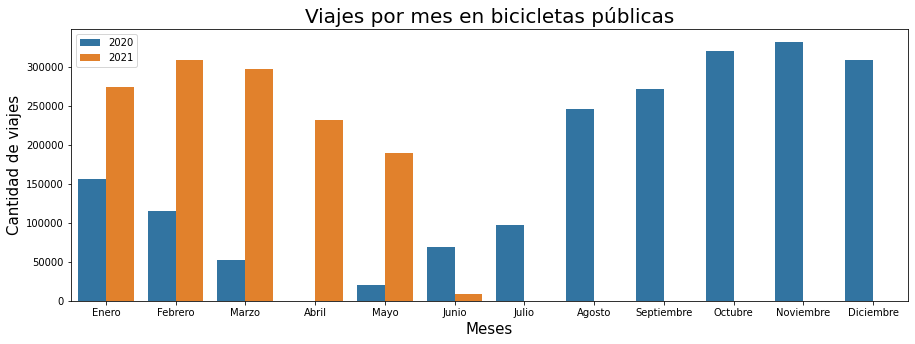

In [57]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Mes", hue="Año", data=df) #2020 vs 2021
ax.set_xticklabels(labels = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])
plt.title("Viajes por mes en bicicletas públicas", size=20)
plt.xlabel("Meses", size=15)
plt.ylabel("Cantidad de viajes", size=15)
plt.legend(loc="best", frameon=True)
plt.show()

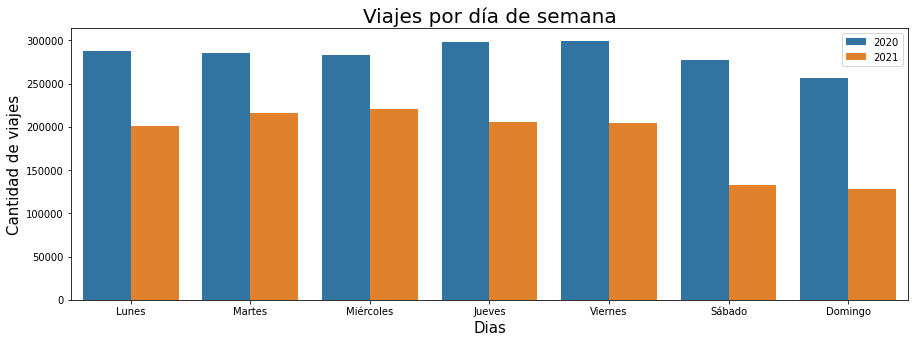

In [58]:
plt.figure(figsize=(15,5))
ax  = sns.countplot(data=df , x="Día de la semana", hue="Año") #2020 vs 2021
ax.set_xticklabels(labels = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"])
plt.title("Viajes por día de semana", size=20)
plt.xlabel("Dias", size=15)
plt.ylabel("Cantidad de viajes", size=15)
plt.legend(loc="best", frameon=True)
plt.show()

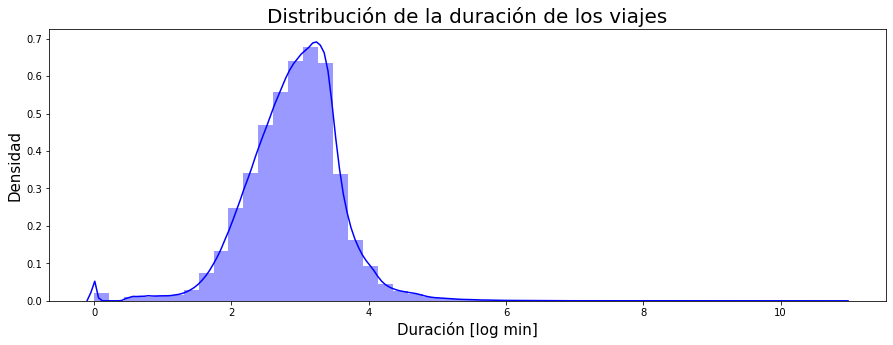

In [59]:
plt.figure(figsize=(15,5))
sns.distplot(np.log(1+df['Duración']),color='b')
plt.title("Distribución de la duración de los viajes", size=20)
plt.xlabel("Duración [log min]", size=15)
plt.ylabel("Densidad", size=15)
plt.show()

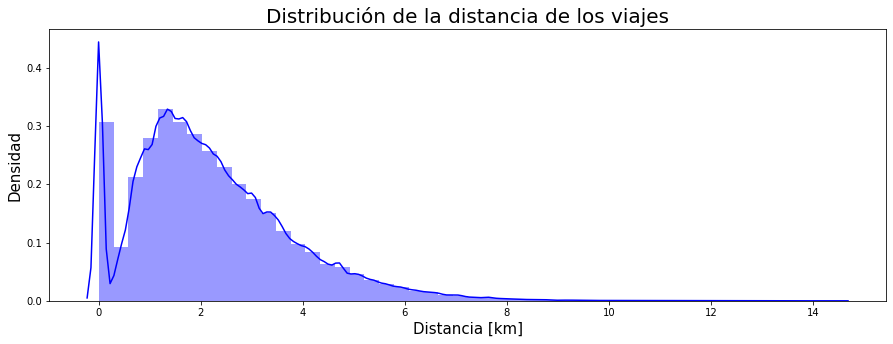

In [60]:
plt.figure(figsize=(15,5))
sns.distplot(df['Distancia recorrido'],color='b')
plt.title("Distribución de la distancia de los viajes", size=20)
plt.xlabel("Distancia [km]", size=15)
plt.ylabel("Densidad", size=15)
plt.show()

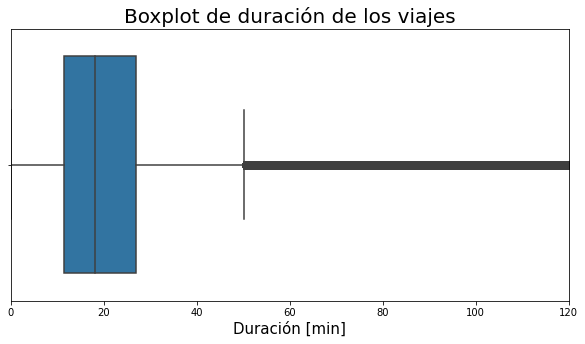

In [61]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Duración', data = df)
ax.set_xlim(0, 120)
plt.title("Boxplot de duración de los viajes", size=20)
plt.xlabel("Duración [min]", size=15)
plt.show()

(0.0, 150.0)

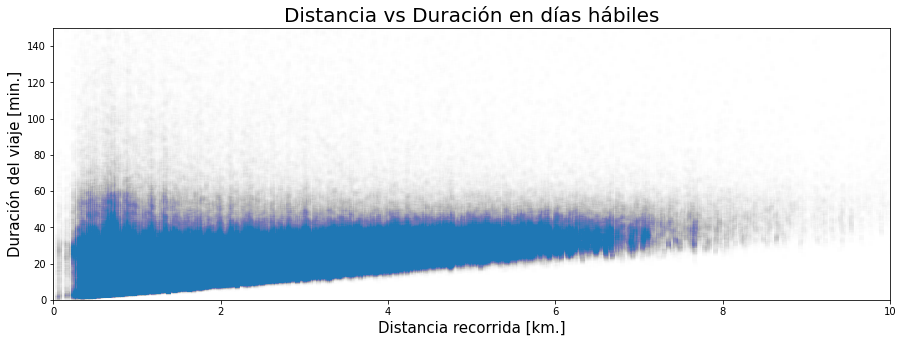

In [62]:
#mascara para descartar outlayers
mask = (df['Distancia recorrido'] > 0) & (df['Duración'] > 0) & (df['Día de la semana'] < 5)
x = df.where(mask).dropna(how = 'all')
#grafico
plt.figure(figsize=(15,5))
ax = sns.scatterplot(data=x, x="Distancia recorrido", y="Duración", alpha=0.005)
plt.title("Distancia vs Duración en días hábiles", size=20)
plt.xlabel("Distancia recorrida [km.]", size=15)
plt.ylabel("Duración del viaje [min.]", size=15)
ax.set_xlim(0, 10)
ax.set_ylim(0, 150)

(0.0, 150.0)

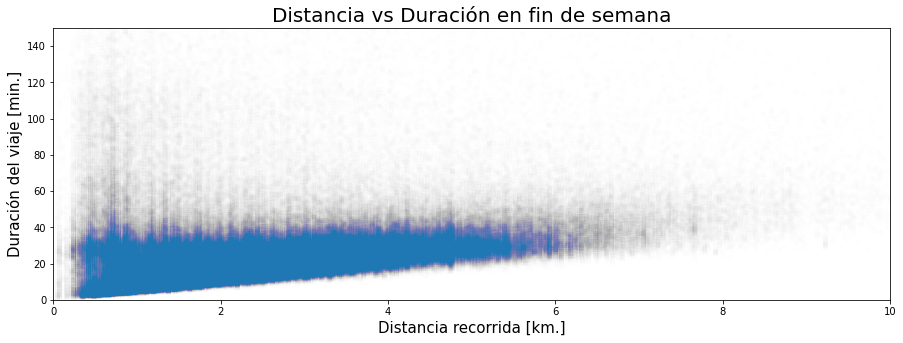

In [63]:
#mascara para descartar outlayers
mask = (df['Distancia recorrido'] > 0) & (df['Duración'] > 0) & (df['Duración'] < 600) & (df['Día de la semana'] > 4)
x = df.where(mask).dropna(how = 'all')
#grafico
plt.figure(figsize=(15,5))
ax = sns.scatterplot(data=x, x="Distancia recorrido", y="Duración", alpha=0.005)
plt.title("Distancia vs Duración en fin de semana", size=20)
plt.xlabel("Distancia recorrida [km.]", size=15)
plt.ylabel("Duración del viaje [min.]", size=15)
ax.set_xlim(0, 10)
ax.set_ylim(0, 150)

(0.0, 150.0)

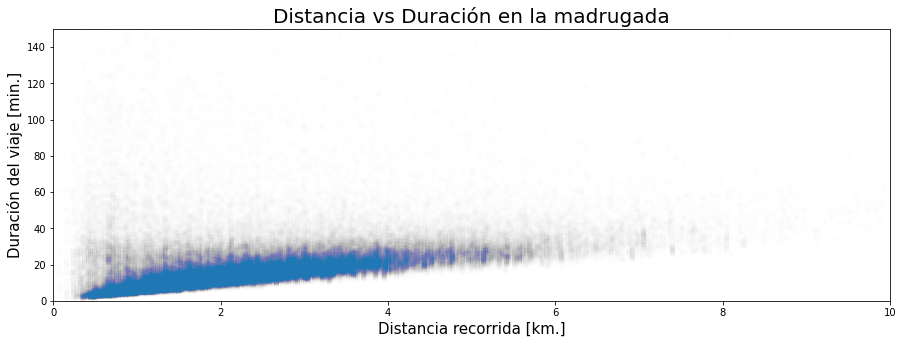

In [64]:
#mascara para descartar outlayers
mask = (df['Distancia recorrido'] > 0) & (df['Duración'] > 0) & (df['Duración'] < 600) & (df['Hora'] < 6)
x = df.where(mask).dropna(how = 'all')
#grafico
plt.figure(figsize=(15,5))
ax = sns.scatterplot(data=x, x="Distancia recorrido", y="Duración", alpha=0.005)
plt.title("Distancia vs Duración en la madrugada", size=20)
plt.xlabel("Distancia recorrida [km.]", size=15)
plt.ylabel("Duración del viaje [min.]", size=15)
ax.set_xlim(0, 10)
ax.set_ylim(0, 150)

(0.0, 150.0)

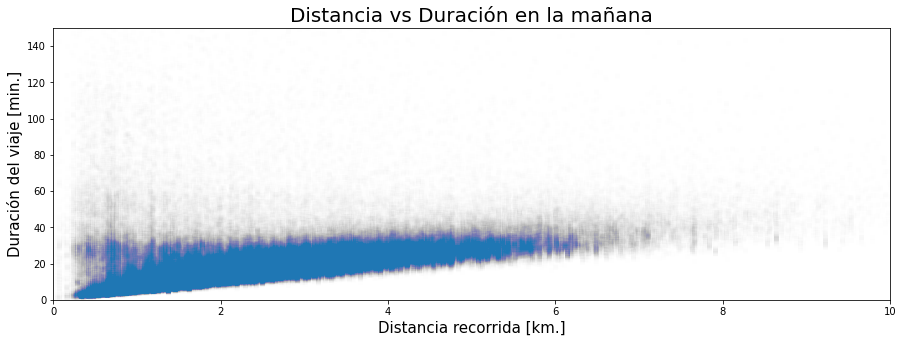

In [65]:
#mascara para descartar outlayers
mask = (df['Distancia recorrido'] > 0) & (df['Duración'] > 0) & (df['Duración'] < 600) & (df['Hora'] > 6) & (df['Hora'] < 12)
x = df.where(mask).dropna(how = 'all')
#grafico
plt.figure(figsize=(15,5))
ax = sns.scatterplot(data=x, x="Distancia recorrido", y="Duración", alpha=0.005)
plt.title("Distancia vs Duración en la mañana", size=20)
plt.xlabel("Distancia recorrida [km.]", size=15)
plt.ylabel("Duración del viaje [min.]", size=15)
ax.set_xlim(0, 10)
ax.set_ylim(0, 150)

(0.0, 150.0)

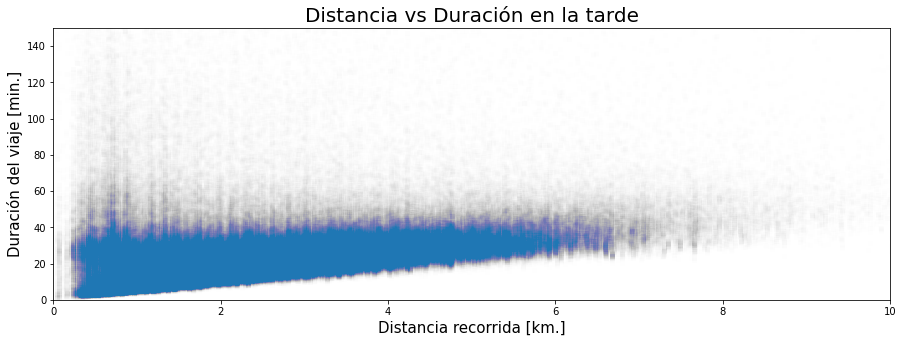

In [66]:
#mascara para descartar outlayers
mask = (df['Distancia recorrido'] > 0) & (df['Duración'] > 0) & (df['Duración'] < 600) & (df['Hora'] > 12) & (df['Hora'] < 18)
x = df.where(mask).dropna(how = 'all')
#grafico
plt.figure(figsize=(15,5))
ax = sns.scatterplot(data=x, x="Distancia recorrido", y="Duración", alpha=0.005)
plt.title("Distancia vs Duración en la tarde", size=20)
plt.xlabel("Distancia recorrida [km.]", size=15)
plt.ylabel("Duración del viaje [min.]", size=15)
ax.set_xlim(0, 10)
ax.set_ylim(0, 150)

(0.0, 150.0)

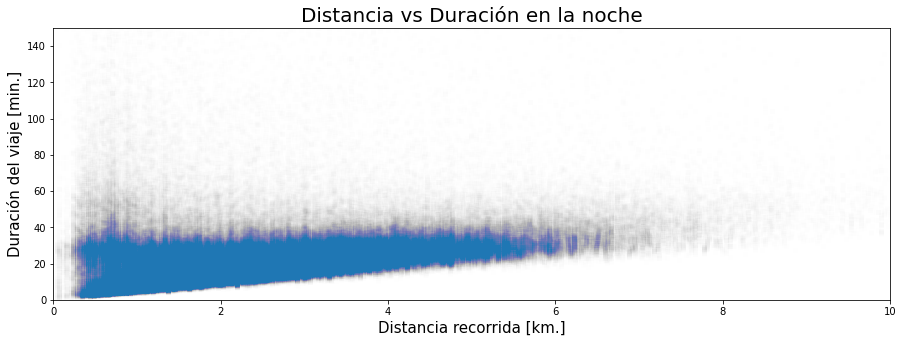

In [67]:
#mascara para descartar outlayers
mask = (df['Distancia recorrido'] > 0) & (df['Duración'] > 0) & (df['Hora'] > 18)
x = df.where(mask).dropna(how = 'all')
#grafico
plt.figure(figsize=(15,5))
ax = sns.scatterplot(data=x, x="Distancia recorrido", y="Duración", alpha=0.005)
plt.title("Distancia vs Duración en la noche", size=20)
plt.xlabel("Distancia recorrida [km.]", size=15)
plt.ylabel("Duración del viaje [min.]", size=15)
ax.set_xlim(0, 10)
ax.set_ylim(0, 150)

(0.0, 150.0)

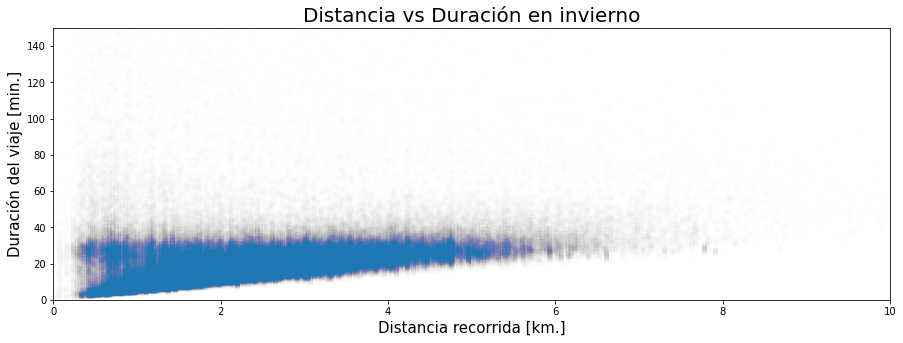

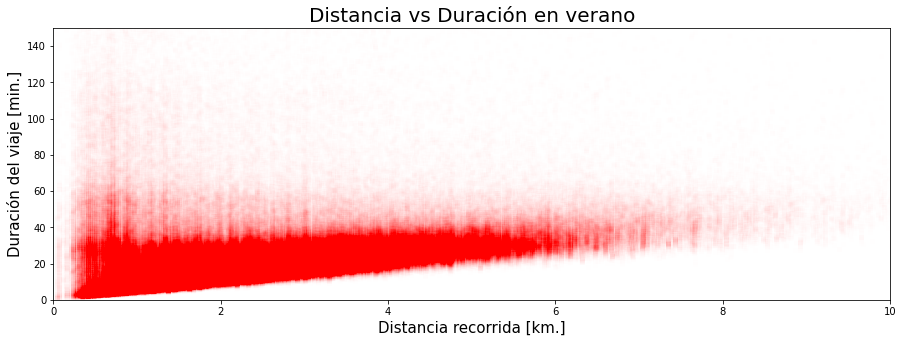

In [68]:
#INVIERNO VS VERANO

#mascara para descartar outlayers
mask = (df['Distancia recorrido'] > 0) & (df['Duración'] > 0) & (df['Mes'] > 5) & (df['Mes'] < 9)
x = df.where(mask).dropna(how = 'all')
#grafico
plt.figure(figsize=(15,5))
ax = sns.scatterplot(data=x, x="Distancia recorrido", y="Duración", alpha=0.005)
plt.title("Distancia vs Duración en invierno", size=20)
plt.xlabel("Distancia recorrida [km.]", size=15)
plt.ylabel("Duración del viaje [min.]", size=15)
ax.set_xlim(0, 10)
ax.set_ylim(0, 150)

#mascara para descartar outlayers
mask = (df['Distancia recorrido'] > 0) & (df['Duración'] > 0) & (df['Mes'] < 4)
x = df.where(mask).dropna(how = 'all')
#grafico
plt.figure(figsize=(15,5))
ax = sns.scatterplot(data=x, x="Distancia recorrido", y="Duración", alpha=0.005, color="r")
plt.title("Distancia vs Duración en verano", size=20)
plt.xlabel("Distancia recorrida [km.]", size=15)
plt.ylabel("Duración del viaje [min.]", size=15)
ax.set_xlim(0, 10)
ax.set_ylim(0, 150)

Text(0, 0.5, 'Latitud')

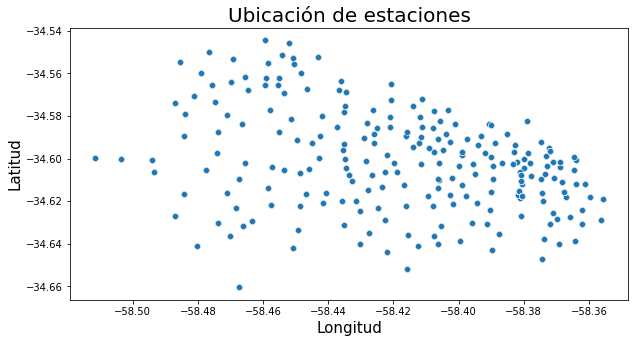

In [69]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=df, y="Latitud inicio", x="Longitud inicio")
plt.title("Ubicación de estaciones", size=20)
plt.xlabel("Longitud", size=15)
plt.ylabel("Latitud", size=15)

In [70]:
fig = go.Figure()
# Recorremos los datos del archivo y extraemos sus coordenadas,
# etiquetas a mostrar y especificamos características del marcador
for i in ubicacion_estaciones:
    fig.add_trace(go.Scattergeo(
            lon = ubicacion_estaciones['Longitud'],
            lat = ubicacion_estaciones['Latitud'],
            text = ubicacion_estaciones["nombre"],
            marker = dict(
                size = 10,
                color = 'lightseagreen',
                line_color='black',
                line_width=0.5,
                sizemode = 'area'
        )))
 
# Establecemos las características del mapa base, el título y opciones
# de leyenda, así como la propia proyección del mapa.
fig.update_layout(
    title_text = 'Estaciones de EcoBici',
    showlegend = False,
    geo = dict(
        scope='world',
        resolution=110,
        projection_type='mollweide',
        showcoastlines=True,
        showocean=True,
        oceancolor='#132630',
        lakecolor='#132630',
        coastlinecolor='#224354',
        landcolor='#224354',
    )
)
fig.show()

In [71]:
df["Estación de inicio"].value_counts().head() #las 5 estaciones mas utilizadas

GODOY CRUZ Y LIBERTADOR    47804
PACIFICO                   47537
PARQUE CENTENARIO          46097
PLAZA BOLIVIA              43527
BARRANCAS DE BELGRANO      40609
Name: Estación de inicio, dtype: int64

In [72]:
df["Estación de fin"].value_counts().head() #las 5 estaciones mas utilizadas

GODOY CRUZ Y LIBERTADOR    48341
PACIFICO                   44823
PLAZA BOLIVIA              44640
PARQUE CENTENARIO          44373
BARRANCAS DE BELGRANO      40884
Name: Estación de fin, dtype: int64

In [73]:
df["Duración"].mean()

22.665581106671272

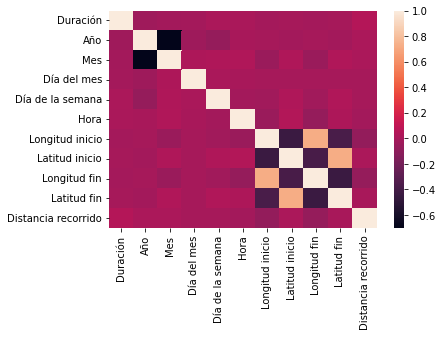

In [74]:
sns.heatmap(pd.DataFrame(df).corr())
plt.show()

In [75]:
#Calculamos la velocidad para poder segmentar los recorridos que van de una estación a otra sin detenerse 
df["Velocidad"] = df["Distancia recorrido"] / df["Duración"]
df["Velocidad"] = df["Velocidad"].round(2)
df.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,Año,Mes,Día del mes,Día de la semana,Hora,Recorrido,Longitud inicio,Latitud inicio,Longitud fin,Latitud fin,Distancia recorrido,Velocidad
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,2020,12,31,3,23,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42,0.16
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,2020,12,29,1,12,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42,0.16
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,2020,12,21,0,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42,0.11
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,2020,12,20,6,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42,0.14
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,2020,12,20,6,13,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42,0.10


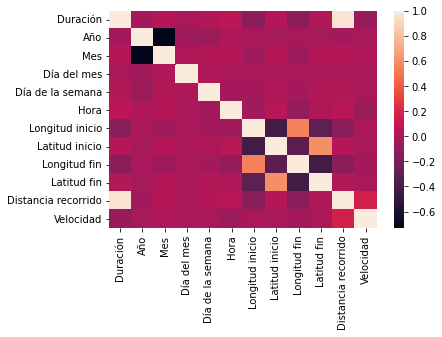

In [76]:
mask = (df['Velocidad'] > 0.15) & (df["Duración"] > 0)
df_2 = df.where(mask).dropna(how = 'all')
sns.heatmap(pd.DataFrame(df_2).corr())
plt.show()

(0.0, 80.0)

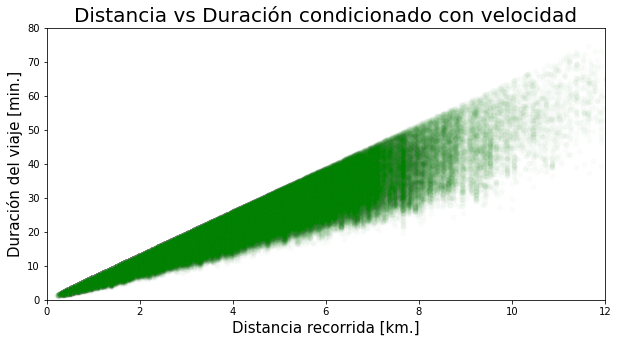

In [77]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=df_2, x="Distancia recorrido", y="Duración", alpha=0.02, color="g")
plt.title("Distancia vs Duración condicionado con velocidad", size=20)
plt.xlabel("Distancia recorrida [km.]", size=15)
plt.ylabel("Duración del viaje [min.]", size=15)
ax.set_xlim(0, 12)
ax.set_ylim(0, 80)

In [78]:
np.shape(df_2)[0] / np.shape(df)[0] #un tercio de los viajes son de interes

0.29700903208575624